# What is Loan Prediction Analysis?

- Loan prediction analysis uses specific parameters about a loan application to determine whether a loan should get approved or Not. 
- Approved loans usually have a good credit history, decent applicant income, and reliability in other factors. 
- Banks use statistical and manual methods to verify these factors and decide about the applicant's loan status.

## Why is Loan Prediction Needed?

- Manual processing of loan applications is a long, error-prone, and often biased process. 
- It might lead to financial disaster for banks and obstruct genuine applicants from getting the needed loans. 
- Loan Prediction using machine learning tools and techniques can help financial institutions quickly process applications by rejecting high-risk customers entirely, accepting worthy customers, or assigning them to a manual review. 
- Such processes with loan prediction using machine learning intact can reduce loan processing times by nearly 40%.

## Importing Necessary Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report

## Importing Dataset

In [2]:
df = pd.read_csv("loan_sanction_train.csv")

### Displaying First 5 Entries

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Displaying Last 5 Entries

In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


### Displaying Random 5 Entries

In [5]:
df.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
162,LP001565,Male,Yes,1,Graduate,No,3089,1280.0,121.0,360.0,0.0,Semiurban,N
381,LP002229,Male,No,0,Graduate,No,5941,4232.0,296.0,360.0,1.0,Semiurban,Y
386,LP002239,Male,No,0,Not Graduate,No,2346,1600.0,132.0,360.0,1.0,Semiurban,Y
131,LP001473,Male,No,0,Graduate,No,2014,1929.0,74.0,360.0,1.0,Urban,Y
88,LP001289,Male,No,0,Graduate,No,8566,0.0,210.0,360.0,1.0,Urban,Y


# About Data

> Given below is the description for each variable.

- Loan_ID :- A unique id

- Gender :- Gender of the applicant Male/female

- Married :- Marital Status of the applicant, values will be Yes/ No

- Dependents :- It tells whether the applicant has any dependents or not.

- Education : It will tell us whether the applicant is Graduated or not.

- Self_Employed :- This defines that the applicant is self-employed i.e. Yes/ No.

- ApplicantIncome:- Applicant income

- CoapplicantIncome :- Co-applicant income

- LoanAmount :- Loan amount (in thousands)

- Loan_Amount_Term :- Terms of loan (in months)

- Credit_History :-Credit history of individual’s repayment of their debts

- Property_Area :- Area of property i.e. Rural/Urban/Semi-urban 

- Loan_Status :- Status of Loan Approved or not i.e. Y- Yes, N-No 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Checking for Null Values

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

It can be clearly seen that **Gender**, **Married**, **Dependents**, **Self_Employed**, **LoanAmount**, **Loan_Amount_Term** & **Credit_HIstory** columns contains null values.

In [8]:
df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

Independent Featuere has 2 types of values. Hence It is a **Binary classification Problem**.

## Data Preprocessing

In [9]:
df["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

**Dependents** column contains a 3+ values which cannot be used further. so replacing it with another value.

In [10]:
df["Dependents"] = df["Dependents"].replace("3+",4)

Replacing **3+ value with 4**. 

## Handling Null Values

In [11]:
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["Married"].fillna(df["Married"].mode()[0],inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0],inplace=True)

df["LoanAmount"].fillna(df["LoanAmount"].mean(),inplace=True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0],inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0],inplace=True)



Replacing Null Values of object type columns with mode.

Replacimg Null Values of Numeric type Columns with their mean. 

In [12]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


There is no null value on dataset.

## Exploratory Data Analysis

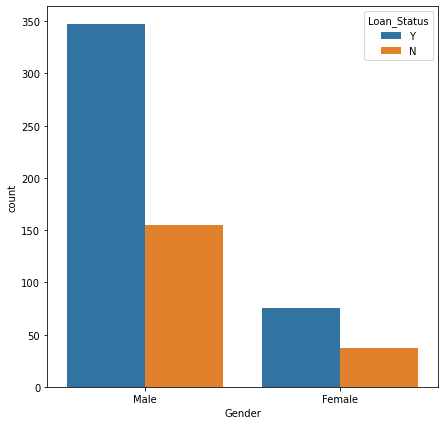

In [14]:
plt.figure(figsize=(7,7))
sns.countplot(x="Gender",hue="Loan_Status",data=df)
plt.show()

**The Above Bar Graph shows that chances of Loan getting approved for males are very high as compared to Females.**

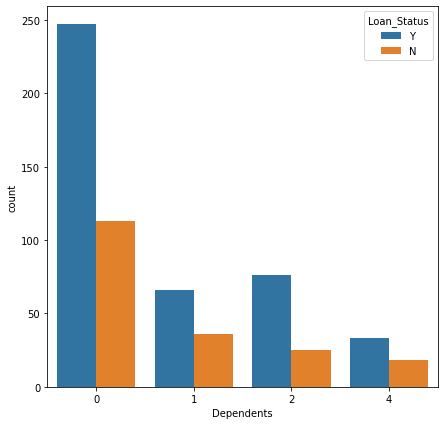

In [15]:
plt.figure(figsize=(7,7))
sns.countplot(x="Dependents",hue="Loan_Status",data=df)
plt.show()

**People having 0 dependents have high chances of loan approval**

<AxesSubplot:xlabel='Education', ylabel='count'>

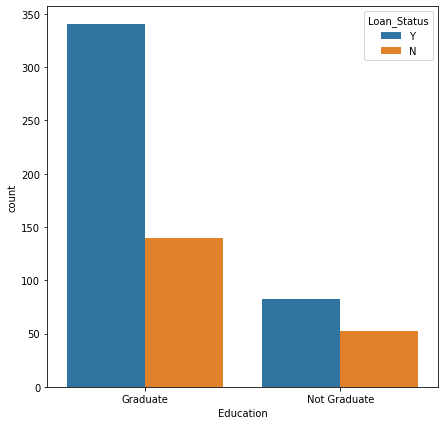

In [16]:
plt.figure(figsize=(7,7))
sns.countplot(x="Education",hue="Loan_Status",data=df)

####  From above countplot it is clearly seen that if a person is educated his chances of getting loan approved is very high as compared to less educated person.

<AxesSubplot:xlabel='Married', ylabel='count'>

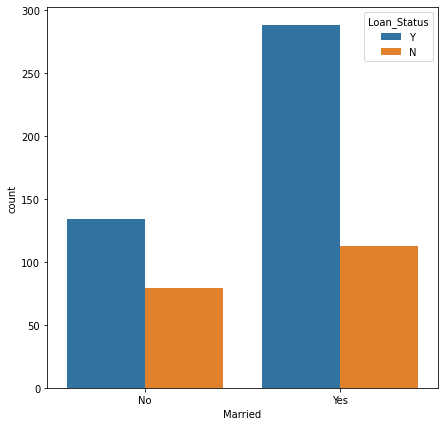

In [17]:
plt.figure(figsize=(7,7))
sns.countplot(x="Married",hue="Loan_Status",data=df)

#### The above counplot shows that if a person is married there is a high chance that his loan will be approved. whereas if person is not married the chance of loan getting approved is less. 

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

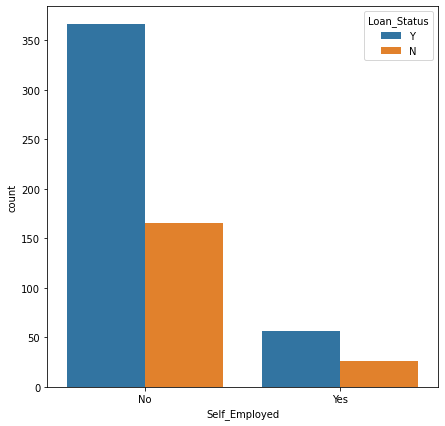

In [18]:
plt.figure(figsize=(7,7))
sns.countplot(x="Self_Employed",hue="Loan_Status",data=df)

####  The above countplot shows that if a person is self employed his chances of getting loan approved is very less, while if a person is not sel employed his chances of getting loan approved is very high 

<AxesSubplot:title={'center':'Property_Area'}>

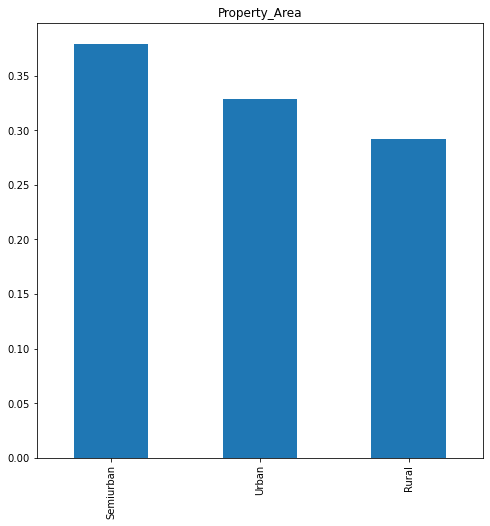

In [19]:
plt.figure(figsize=(8,8))
df["Property_Area"].value_counts(normalize=True).plot.bar(title="Property_Area")


- 38% people from Semiurban area

- 33% people from Urban area

- 29% people from Rural area

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

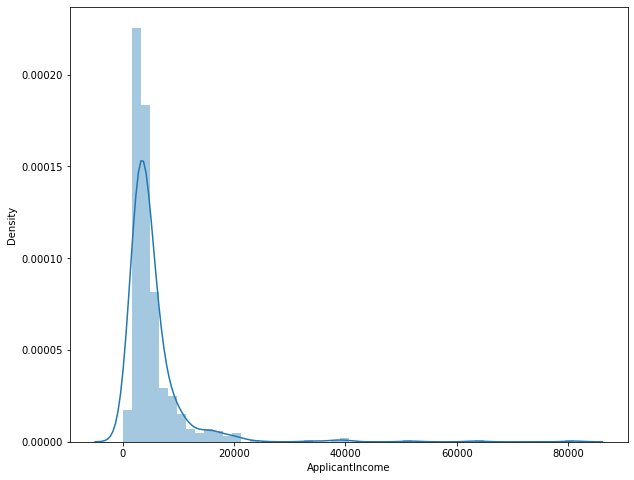

In [20]:
plt.figure(figsize=(10,8))
sns.distplot(df["ApplicantIncome"])


**It can be inferred that most of the data in the distribution of applicant income is towards left which means it is Right Skewed.** 

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

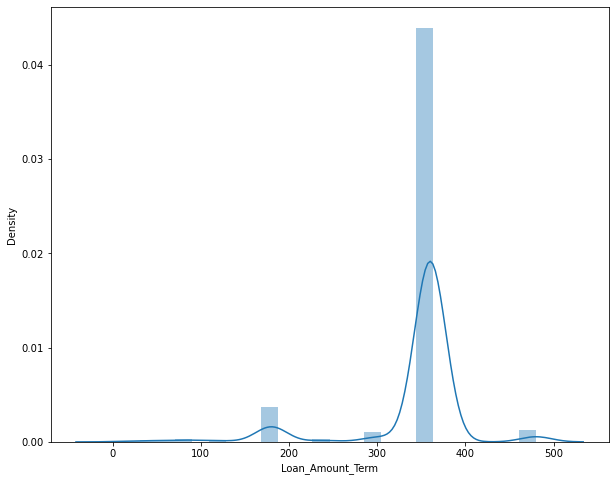

In [21]:
plt.figure(figsize=(10,8))
sns.distplot(df["Loan_Amount_Term"])

**It can be inferred that most of the data is towards right side which means it is left skewed**

## Label Encoding

Since our dataset contains some categorical colums which will not be understood by our machine, so we need to convert **object type** data into **numeric type** 

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
df["Gender"] = le.fit_transform(df["Gender"])
df["Married"] = le.fit_transform(df["Married"])
df["Education"] = le.fit_transform(df["Education"])
df["Self_Employed"] = le.fit_transform(df["Self_Employed"])
df["Property_Area"] = le.fit_transform(df["Property_Area"])
df["Loan_Status"] = le.fit_transform(df["Loan_Status"])


In [24]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1,1,4,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


## Splitting data 

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x=df.iloc[:,1:-1]
y=df.iloc[:,-1]

In [27]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [28]:
xtrain

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
291,1,1,2,0,0,4400,0.0,127.0,360.0,0.0,1
507,1,0,0,0,0,3583,0.0,96.0,360.0,1.0,2
328,0,1,0,0,0,4333,2451.0,110.0,360.0,1.0,2
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
69,0,0,0,0,0,4300,0.0,136.0,360.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
129,1,1,0,0,0,6080,2569.0,182.0,360.0,1.0,0
144,1,1,2,0,0,11757,0.0,187.0,180.0,1.0,2
72,1,0,0,0,0,3500,0.0,81.0,300.0,1.0,1
235,1,1,1,0,0,5500,1260.0,170.0,360.0,1.0,0


In [29]:
ytrain

291    0
507    0
328    0
609    1
69     0
      ..
129    0
144    1
72     1
235    1
37     1
Name: Loan_Status, Length: 491, dtype: int32

In [30]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    print(classification_report(ytest,ypred))

**This Function is created in order to fit data for each model and to predict, display accuracies of respective models.**

### Feature Scaling

In [31]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.fit_transform(xtest)

## Model Creation

In [32]:
svm = SVC()
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rfc = RandomForestClassifier()
xgb = XGBClassifier()

## Model Evaluation

In [33]:
mymodel(logreg)

              precision    recall  f1-score   support

           0       0.89      0.41      0.56        39
           1       0.78      0.98      0.87        84

    accuracy                           0.80       123
   macro avg       0.83      0.69      0.71       123
weighted avg       0.82      0.80      0.77       123



In [34]:
mymodel(knn)

              precision    recall  f1-score   support

           0       0.65      0.38      0.48        39
           1       0.76      0.90      0.83        84

    accuracy                           0.74       123
   macro avg       0.71      0.64      0.65       123
weighted avg       0.73      0.74      0.72       123



In [35]:
mymodel(dt)

              precision    recall  f1-score   support

           0       0.42      0.56      0.48        39
           1       0.76      0.63      0.69        84

    accuracy                           0.61       123
   macro avg       0.59      0.60      0.58       123
weighted avg       0.65      0.61      0.62       123



In [36]:
mymodel(rfc)

              precision    recall  f1-score   support

           0       0.68      0.44      0.53        39
           1       0.78      0.90      0.84        84

    accuracy                           0.76       123
   macro avg       0.73      0.67      0.68       123
weighted avg       0.75      0.76      0.74       123



In [37]:
mymodel(svm)

              precision    recall  f1-score   support

           0       0.89      0.41      0.56        39
           1       0.78      0.98      0.87        84

    accuracy                           0.80       123
   macro avg       0.83      0.69      0.71       123
weighted avg       0.82      0.80      0.77       123



In [38]:
mymodel(xgb)

              precision    recall  f1-score   support

           0       0.56      0.46      0.51        39
           1       0.77      0.83      0.80        84

    accuracy                           0.72       123
   macro avg       0.67      0.65      0.65       123
weighted avg       0.70      0.72      0.71       123



> LogisticRegression Model gives : 80% Accuracy

> KNearestNeighbors Model gives : 73% Accuracy

> DecisionTreeClassifier Model gives : 62% Accuracy

> SupportVectorClassifier Model gives : 80% Accuracy

> RabdomForestClassifier Model gives : 75% Accuracy

> XGBClassifier Model gives : 72% Accuracy 

**LogisticRegression and SupportVectorMachine both gives same accuracy.**
**We will Build our final model using LogisticRegression**

Reasons ?

- Independent Feature has Binary Output which is best suitable for LogisticRegression.
- Dataset is not too big.
- We can use **Liblinear** solver which can handle small dataset with combination of penalty terms such as **l1** & **l2**.


## Final Model

In [39]:
logreg  = LogisticRegression(solver="liblinear")
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.89      0.41      0.56        39
           1       0.78      0.98      0.87        84

    accuracy                           0.80       123
   macro avg       0.83      0.69      0.71       123
weighted avg       0.82      0.80      0.77       123

